# Procesamiento de Imagen y Señales MIA-B
# Entrega ejercicio práctico clase 1 - Grupo 7

**Fecha:** 2026-01-02  
**Versión:** 1.0

## Descripción
El presente documento tiene por objetivo presentar la tarea corespondencia a la semana 1

## Objetivos

- Cargue una imagen distinta a la trabajada en clase y aplique todas las operaciones básicas de modificación de la imagen usando una de las librerías vistas en clase (PIL u OpenCV)
- Tome una foto con la cámara de su computador, imprima sus características como tamaño y forma, luego recórtela para que solo se pueda observar los ojos de una persona.
- A la misma imagen tomada con la cámara, rotéla 180 grados, realice el reflejo de ella y mejore su enfoque si es posible.
- Toma una foto con la cámara del computador a una persona con lentes y aplique la detección de bordes con el fin de detectar solo los lentes de la persona y su silueta sin usar componentes adicionales que los vistos en clases.

## Actividad 1:

### Configuración del Entorno

In [1]:
# Importación de librerías estándar
import cv2
import numpy as np
from PIL import Image, ImageFilter

#Librerias para obtener el path de un archivo
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use("seaborn-v0_8")
%matplotlib inline

### Parámetros Globales
Descripción de las variables constantes

In [2]:
INPUT_PATH = r"C:/Users/cyanezru/Downloads/foto.jpg"
ALPHA = 1.2
BETA = 30
BLUR_KSIZE = 5 
SAVE_RESULTS = False

### Definición de Métodos
Definición de cada uno de los métodos a usar en la practica

In [3]:
def adjust_brightness_contrast(img, alpha=1.0, beta=0):
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

def to_grayscale(img_bgr):
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

def equalize_hist_gray(img_gray):
    return cv2.equalizeHist(img_gray)

def threshold_global(img_gray, thresh=128):
    _, th = cv2.threshold(img_gray, thresh, 255, cv2.THRESH_BINARY)
    return th

def threshold_otsu(img_gray):
    _, th = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th

def adaptive_threshold(img_gray, block_size=11, C=2):
    return cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, block_size, C)

def gaussian_blur(img, ksize=5):
    return cv2.GaussianBlur(img, (ksize, ksize), 0)

def canny_edges(img_gray, low=50, high=150):
    return cv2.Canny(img_gray, low, high)

def show_and_maybe_save(results, save=False):
    n = len(results)
    cols = min(4, n)
    rows = (n + cols - 1) // cols
    fig, axs = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    axs = np.array(axs).reshape(-1)
    for ax in axs:
        ax.axis('off')
    for i, (title, img) in enumerate(results):
        ax = axs[i]
        if img.ndim == 2:
            ax.imshow(img, cmap='gray')
        else:
            ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(title)
        ax.axis('off')
        if save:
            out_name = f"{i:02d}_{title.replace(' ', '_')}.png"
            if img.ndim == 2:
                cv2.imwrite(out_name, img)
            else:
                cv2.imwrite(out_name, img)
    plt.tight_layout()
    plt.show()

### Llamado a los métodos para la ejecución

Archivo seleccionado: C:/Users/cyanezru/Downloads/Foto.jpg


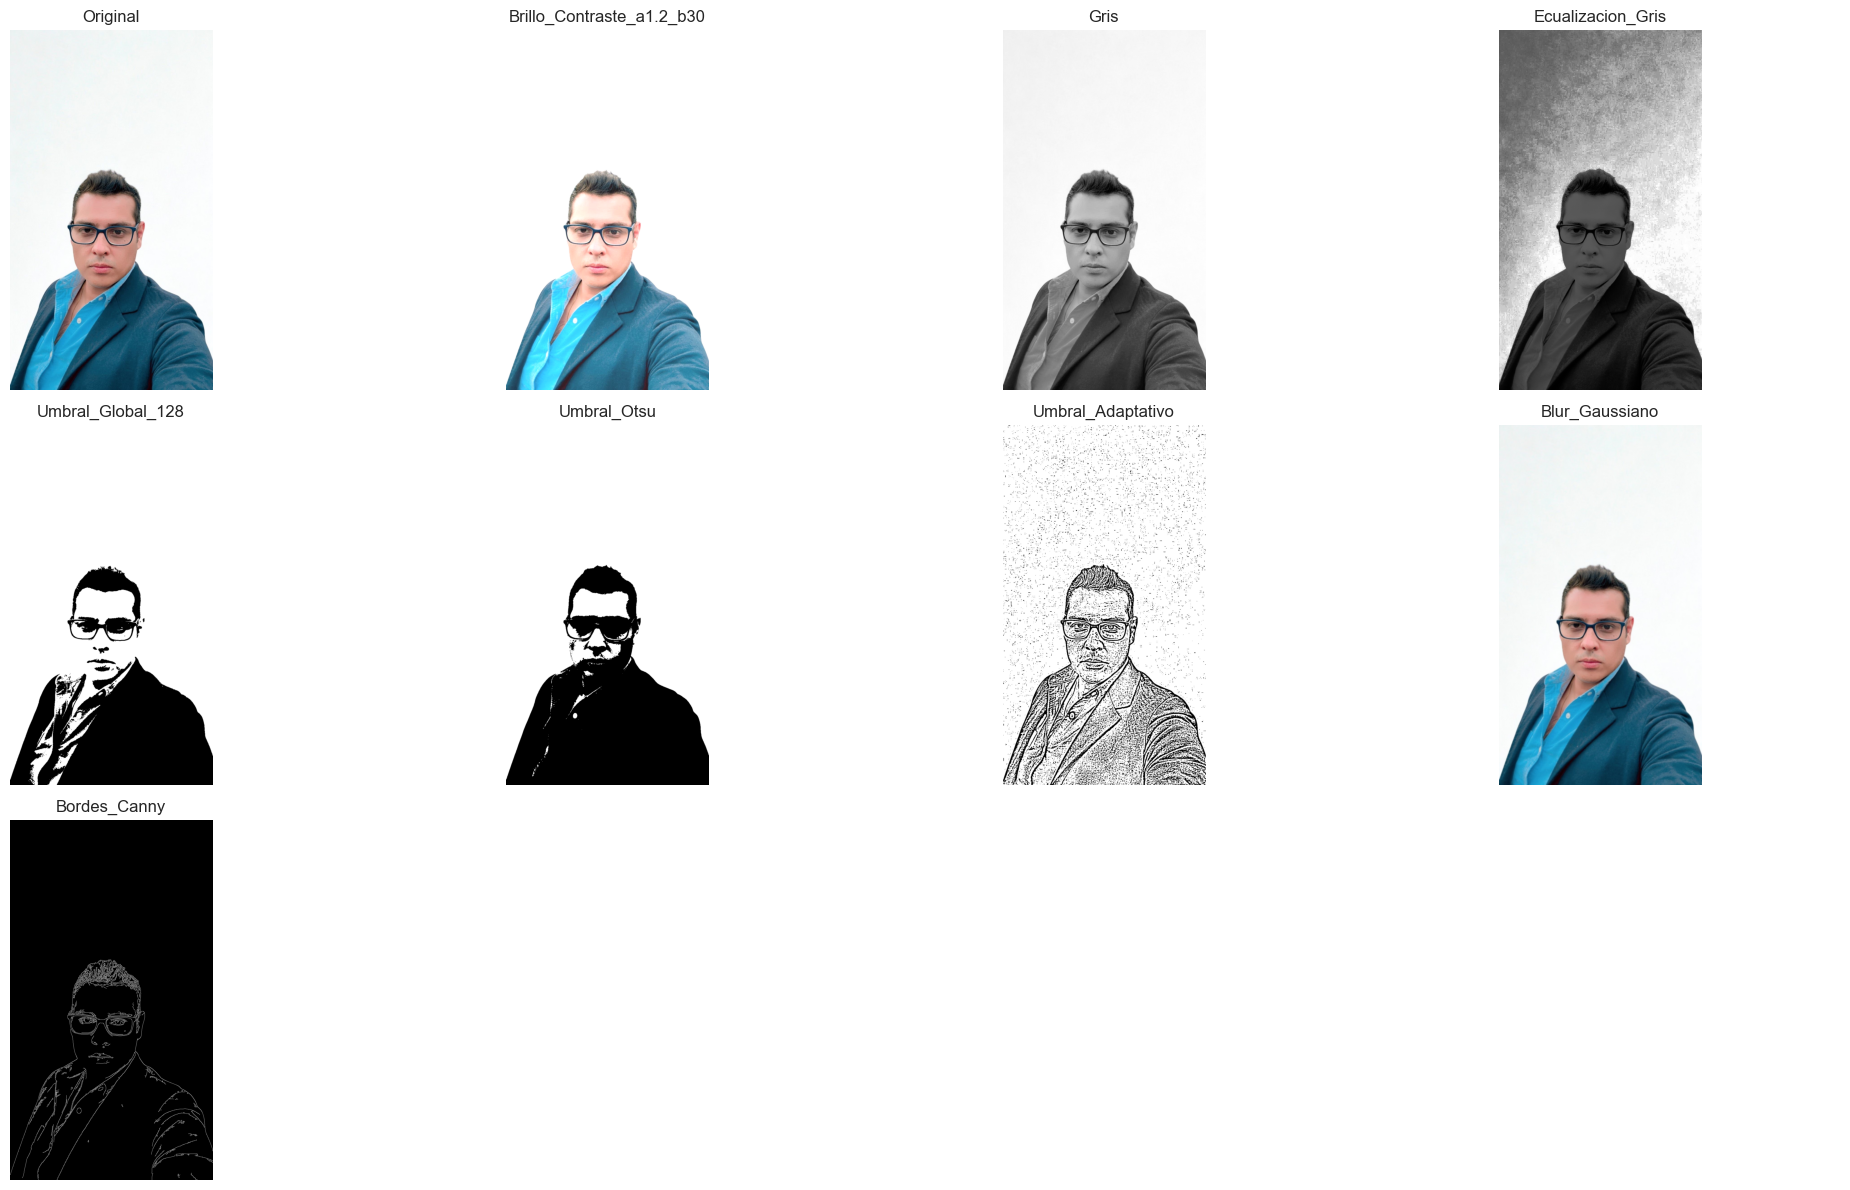

In [4]:
def main():
    # Evita que aparezca la ventana principal de tkinter
    Tk().withdraw()
    file_path = askopenfilename(title="Seleccione un archivo")
    print("Archivo seleccionado:", file_path)
    img_bgr = cv2.imread(file_path)
    if img_bgr is None:
        print(f"Error: no se pudo cargar la imagen en {file_path}")
        return

    img_bc = adjust_brightness_contrast(img_bgr, alpha=ALPHA, beta=BETA)
    img_gray = to_grayscale(img_bgr)
    img_eq = equalize_hist_gray(img_gray)
    img_th_global = threshold_global(img_gray, thresh=128)
    img_th_otsu = threshold_otsu(img_gray)
    img_th_adapt = adaptive_threshold(img_gray, block_size=11, C=2)
    k = BLUR_KSIZE if BLUR_KSIZE % 2 == 1 else BLUR_KSIZE + 1
    img_blur = gaussian_blur(img_bgr, ksize=k)
    img_edges = canny_edges(img_gray)

    results = [
        ("Original", img_bgr),
        (f"Brillo_Contraste_a{ALPHA}_b{BETA}", img_bc),
        ("Gris", img_gray),
        ("Ecualizacion_Gris", img_eq),
        ("Umbral_Global_128", img_th_global),
        ("Umbral_Otsu", img_th_otsu),
        ("Umbral_Adaptativo", img_th_adapt),
        ("Blur_Gaussiano", img_blur),
        ("Bordes_Canny", img_edges),
    ]

    show_and_maybe_save(results, save=SAVE_RESULTS)

if __name__ == "__main__":
    main()

## Actividad 2:

### Método que toma fot con la cámara:

In [5]:
def tomar_foto(archivo):
    # 1. Inicializar la cámara (0 es la cámara por defecto)
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Error: No se pudo acceder a la cámara.")
    else:
        print("Cámara abierta. Presiona 's' para guardar una foto o 'q' para salir.")
        while True:
            # 2. Leer un frame de la cámara
            ret, frame = cap.read()
            if not ret:
                print("Error al capturar el video.")
                break
            # 3. Mostrar el video en vivo en una ventana
            cv2.imshow('Presiona S para tomar foto', frame)
            # 4. Escuchar el teclado
            key = cv2.waitKey(1) & 0xFF
            if key == ord('s'):  # Si presiona 's', guarda la imagen
                cv2.imwrite(archivo, frame)
                print(f"¡Foto guardada como {archivo}!")
                break
            elif key == ord('q'):  # Si presiona 'q', sale sin guardar
                break
        # 5. Liberar la cámara y cerrar ventanas
        cap.release()
        cv2.destroyAllWindows()

### Toma una foto con la cámara:

In [6]:
archivo = "fotografia.jpg"
tomar_foto(archivo)

Cámara abierta. Presiona 's' para guardar una foto o 'q' para salir.
¡Foto guardada como fotografia.jpg!


### Imprime las características:

In [7]:
img = Image.open(archivo)
ancho, alto = img.size
formato = img.format
modo = img.mode
print(f"Dimensiones: {ancho}px de ancho x {alto}px de alto")
print(f"Formato: {formato}")
print(f"Modo de color: {modo}")

Dimensiones: 640px de ancho x 480px de alto
Formato: JPEG
Modo de color: RGB


### Carga clasificadores pre-entrenados de OpenCV para reconocer rostro y ojos:

In [8]:
rec_rostro = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
rec_ojos = cv2.CascadeClassifier('haarcascade_eye.xml')

### Carga imagen y detecta primero la cara para limitar la búsqueda de ojos y evitar errores:

In [9]:
img_cv = cv2.imread(archivo)
img_gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY) # Necesario para la detección

### Detecta cara en la imagen:

In [10]:
rostro = rec_rostro.detectMultiScale(img_gray, 1.3, 5)
img_recortada = None
for (x, y, w, h) in rostro:
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img_cv[y:y+h, x:x+w]
    # Detecta ojos dentro de la región de la cara
    ojos = rec_ojos.detectMultiScale(roi_gray)
    if len(ojos) >= 2:
        # Calcula una caja que envuelva ambos ojos
        ex1, ey1, ew1, eh1 = ojos[0]
        ex2, ey2, ew2, eh2 = ojos[1]
        # Coordenadas extremas para el recorte
        x_min = min(ex1, ex2) + x
        y_min = min(ey1, ey2) + y
        x_max = max(ex1 + ew1, ex2 + ew2) + x
        y_max = max(ey1 + eh1, ey2 + eh2) + y
        # Aplicamos el recorte con un pequeño margen
        margen = 20
        caja = (x_min - margen, y_min - margen, x_max + margen, y_max + margen)
        img_recortada = img.crop(caja)
        break

### Visualización:

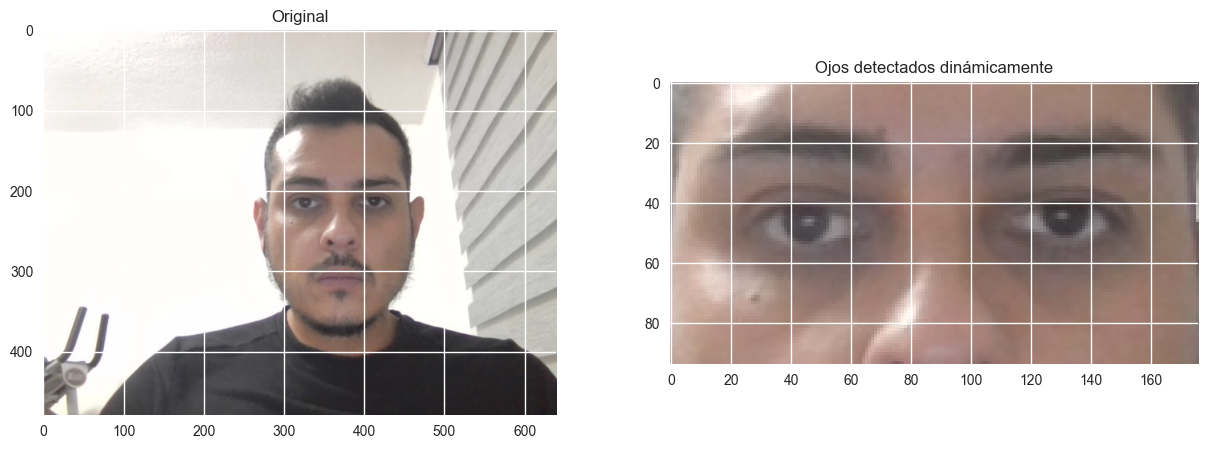

In [11]:
if img_recortada:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].imshow(img)
    axs[0].set_title("Original")
    axs[1].imshow(img_recortada)
    axs[1].set_title("Ojos detectados dinámicamente")
    plt.show()
else:
    print("No se detectaron ojos suficientes para el recorte.")

## Actividad 3:

### CargarImagen:

In [12]:
imagen = "fotografia.jpg"
# Cargar la imagen
img = Image.open(imagen)
# Girar 180 grados
img_rotada = img.rotate(180, expand=True)
# Reflejo
img_reflejada = img.transpose(Image.FLIP_LEFT_RIGHT)
# Mejora el detalle en los bordes
img_enfoque = img.filter(ImageFilter.SHARPEN)

### Visualización:

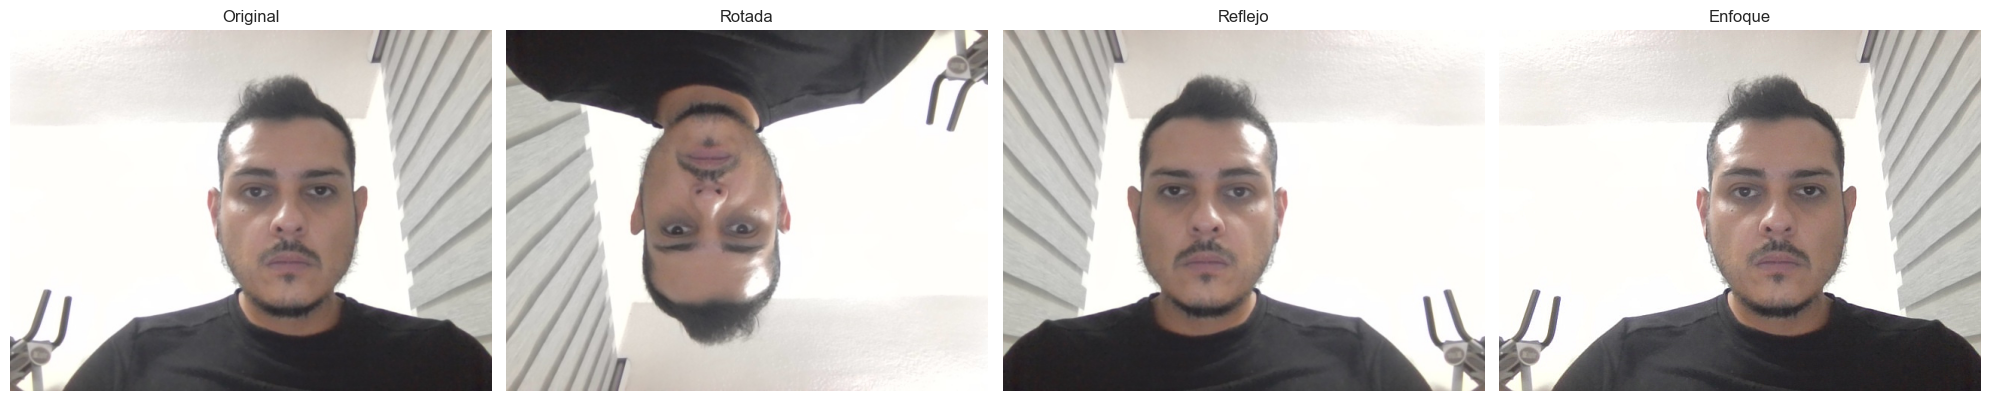

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].imshow(img)
axs[0].set_title("Original")

axs[1].imshow(img_rotada)
axs[1].set_title("Rotada")

axs[2].imshow(img_reflejada)
axs[2].set_title("Reflejo")

axs[3].imshow(img_enfoque)
axs[3].set_title("Enfoque")

for ax in axs: ax.axis('off')
plt.tight_layout()
plt.show()

## Actividad 4:

### Capturar imagen desde la cámara:

In [14]:
# Se define la funcionalidad de grabar video mediante la cámara usando OpenCV
cap = cv2.VideoCapture(0)       # Abre la cámara por defecto

# Se define un bucle infinito para mantener la cámara activa
while True:
    ret, frame = cap.read()     # Captura un frame de la cámara
                                # ret indica si la captura fue exitosa
                                # frame es la imagen capturada

    if not ret:                # Si da error al capturar el frame
        break                  # Sale del bucle

    h, w, _ = frame.shape      # Obtiene alto, ancho y canales de la imagen

    # Tamaño del rectángulo, zona donde se colocarán los lentes
    rect_w = int(w * 0.4)
    rect_h = int(h * 0.25)

    # Coordenadas para centrar el rectángulo en la imagen
    x1 = w // 2 - rect_w // 2
    y1 = h // 2 - rect_h // 2
    x2 = x1 + rect_w
    y2 = y1 + rect_h

    # Se crea una copia del frame original para dibujar encima
    frame_rect = frame.copy()

    # Dibuja un rectángulo verde como guía
    cv2.rectangle(
        frame_rect,
        (x1, y1),
        (x2, y2),
        (0, 255, 0),
        2
    )

    # Escribe un texto encima del rectángulo
    cv2.putText(
        frame_rect,
        "Coloque los lentes aqui",
        (x1, y1 - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (0, 255, 0),
        2
    )

    # Muestra la ventana con la imagen y el rectángulo guía
    cv2.imshow("Presione ESPACIO para capturar", frame_rect)

    # Espera 1 ms y captura la tecla presionada
    key = cv2.waitKey(1)

    if key == 32:              # Si se presiona la tecla ESPACIO
        img = frame.copy()     # Guarda la imagen capturada
        roi_coords = (x1, y1, x2, y2)  # Guarda las coordenadas del rectángulo
        break                  # Sale del bucle
    elif key == 27:            # Si se presiona la tecla ESC
        img = None             # No se guarda ninguna imagen
        break                  # Sale del bucle

# Libera la cámara
cap.release()

# Cierra todas las ventanas de OpenCV
cv2.destroyAllWindows()

### Mostrar la imagen capturada:

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

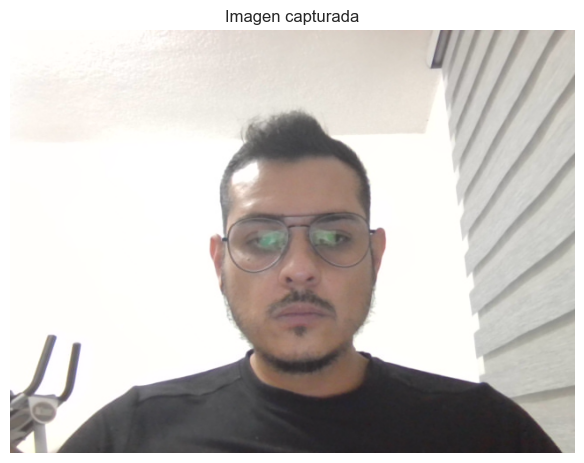

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Imagen capturada")
plt.axis("off")

(np.float64(-0.5), np.float64(255.5), np.float64(119.5), np.float64(-0.5))

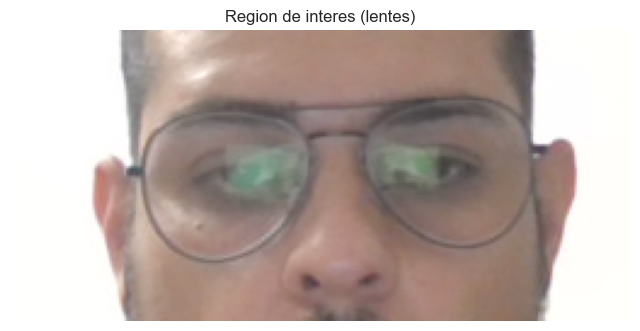

In [16]:
# Se extraen las coordenadas del rectángulo guardadas previamente
x1, y1, x2, y2 = roi_coords

# Se recorta la región de interés desde la imagen original
roi = img[y1:y2, x1:x2]

# Se muestra la región recortada convirtiendo de BGR a RGB
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

# Se agrega un título a la imagen mostrada
plt.title("Region de interes (lentes)")

# Se ocultan los ejes para una visualización más limpia
plt.axis("off")

(np.float64(-0.5), np.float64(255.5), np.float64(119.5), np.float64(-0.5))

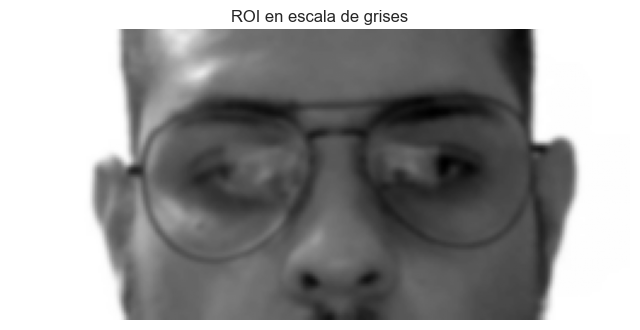

In [17]:
# Convierte la región de interés de color BGR a escala de grises con el objetivo de definir mejor el contorno de los lentes
gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

# Aplica un desenfoque Gaussiano para reducir ruido
blur_roi = cv2.GaussianBlur(
    gray_roi,
    (5, 5),
    0
)

# Muestra la imagen desenfocada usando un mapa de color en grises
plt.imshow(blur_roi, cmap="gray")

# Título de la imagen mostrada
plt.title("ROI en escala de grises")

# Oculta los ejes para una visualización más limpia
plt.axis("off")

(np.float64(-0.5), np.float64(255.5), np.float64(119.5), np.float64(-0.5))

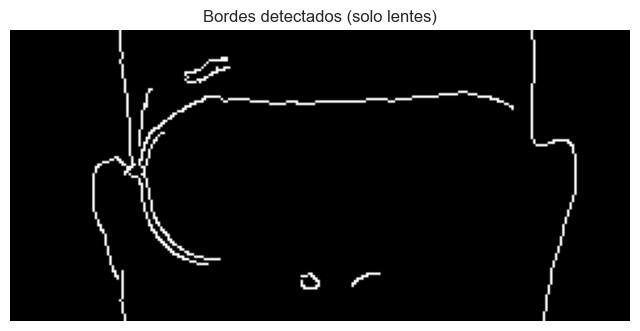

In [18]:
# Aplica el detector de bordes Canny sobre la imagen
edges_roi = cv2.Canny(
    blur_roi,
    50,
    150
)

# Muestra la imagen resultante con los bordes detectados
plt.imshow(edges_roi, cmap="gray")

# Título de la visualización
plt.title("Bordes detectados (solo lentes)")

# Oculta los ejes para una mejor visualización
plt.axis("off")

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

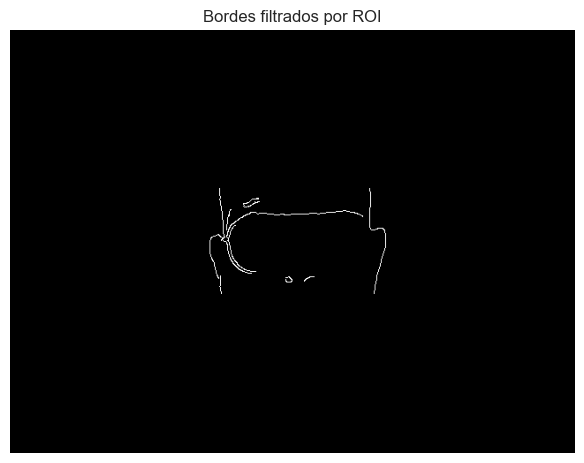

In [19]:
# Crea una imagen vacía con el mismo tamaño que la ROI en escala de grises
edges_full = np.zeros_like(gray_roi)
# ⚠️ Nota: esta variable no se usa después, podrías eliminarla sin afectar el resultado

# Crea una imagen negra del tamaño completo de la imagen original
edges_image = np.zeros(
    img.shape[:2],   # Solo alto y ancho
    dtype=np.uint8   # Tipo de dato para imágenes
)

# Inserta los bordes detectados del ROI en su posición original dentro de la imagen completa
edges_image[y1:y2, x1:x2] = edges_roi
# Se respetan las coordenadas donde estaba el rectángulo de la ROI

# Muestra la imagen final con los bordes solo en la zona de interés
plt.imshow(edges_image, cmap="gray")

# Título de la visualización
plt.title("Bordes filtrados por ROI")

# Oculta los ejes
plt.axis("off")

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

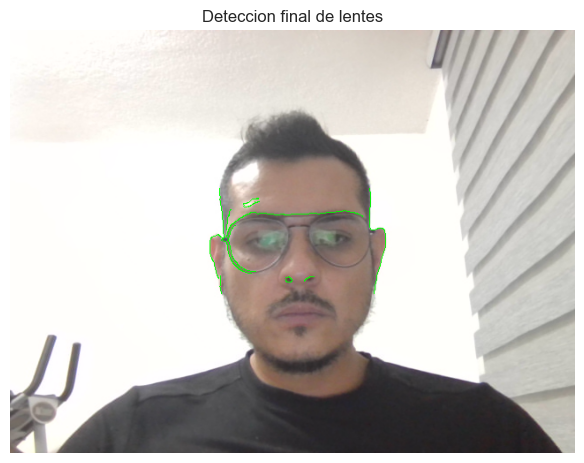

In [20]:
# Crea una copia de la imagen original para no modificarla directamente
result = img.copy()

# Colorea de verde los píxeles donde se detectaron bordes
result[edges_image != 0] = [0, 255, 0]
# edges_image != 0 crea una máscara booleana
# Solo los píxeles con bordes se reemplazan por color verde

# Muestra la imagen final convirtiendo de BGR a RGB
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# Título de la imagen
plt.title("Deteccion final de lentes")

# Oculta los ejes
plt.axis("off")

## Referencias

- Documentación oficial de Python
- Documentación de PIL / NumPy / OpenCV